In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
print("We are in {}".format(os.getcwd()))

We are in /home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts


In [112]:
Results_dir = os.getcwd()+"/../Results/Testing_remesher/8/"



In [113]:
Remesher_info  = np.loadtxt(Results_dir + "Remeshing_count.txt",skiprows=1)


In [114]:
print("The average number of remesh operations is {} the max number of operations is {} and the min number of operations is {} and the std is {}\n".format(np.mean(Remesher_info[:,1]), np.max(Remesher_info[:,1]), np.min(Remesher_info[:,1]),np.std(Remesher_info[:,1])  ))

The average number of remesh operations is 107.2439024390244 the max number of operations is 443.0 and the min number of operations is 0.0 and the std is 99.68652830866559



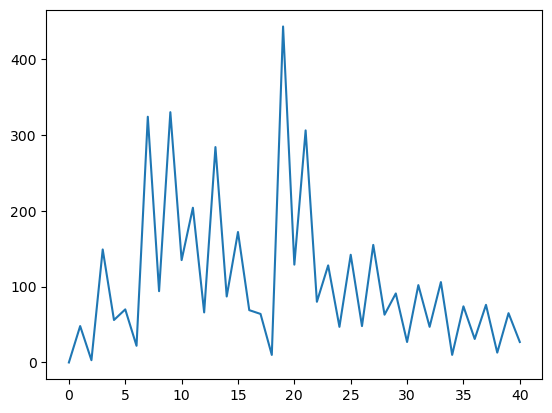

In [115]:
plt.plot(Remesher_info[:,1])
# plt.ylim(0,20)
# plt.xlim(0,100)

2
1


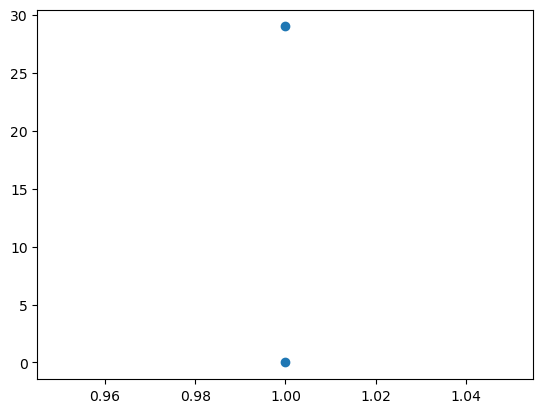

In [102]:
Zero_length_intervals =[]
N_oper_after = []

at_interval = False
count = 0
count_oper =0
for i in range(len(Remesher_info[:,1])):

    if(Remesher_info[i,1]< 1e-1):
        
        if(not(at_interval)):
            at_interval = True
            if(count_oper>0):
                N_oper_after.append(count_oper)
                count_oper=0

        count+=1
    else:
        if(at_interval):
            at_interval = False
            Zero_length_intervals.append(count)
            

            count_oper+= Remesher_info[i,1]
       
        count = 0
        
print(len(Zero_length_intervals))
print(len(N_oper_after))
N_oper_after.append(0)
plt.scatter(Zero_length_intervals,N_oper_after)

The max inverval is 1 the min interval is 1, the mean size of the intervals is 1.0 the variance of size of the intervals is 0.0


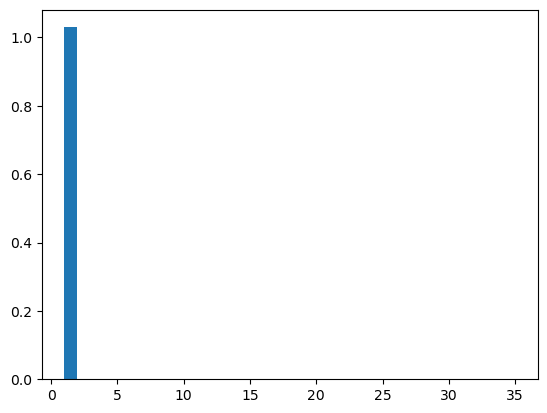

In [103]:
plt.hist(Zero_length_intervals,bins = 35,range=(1,35),density=True)
# plt.xlim(5,36)
# plt.ylim(0,20)
# plt.xlim(1,2)
print("The max inverval is {} the min interval is {}, the mean size of the intervals is {} the variance of size of the intervals is {}".format(np.max(Zero_length_intervals), np.min(Zero_length_intervals),np.mean(Zero_length_intervals), np.std(Zero_length_intervals)))